In [16]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

In [17]:
import csv
df = pd.read_csv('Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

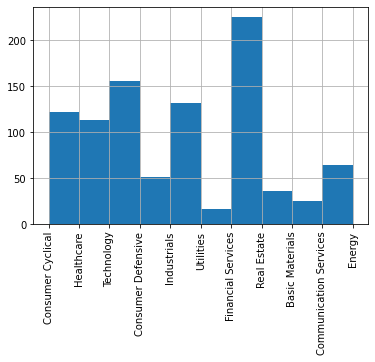

In [18]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [19]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [20]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [21]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [22]:
len(rows)

476

In [23]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


In [24]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               93
Technology                89
Consumer Cyclical         79
Financial Services        68
Healthcare                52
Communication Services    29
Basic Materials           20
Consumer Defensive        19
Energy                    15
Real Estate               11
Utilities                  1
Name: sector, dtype: int64

In [25]:
#df for each sector

df_basic_materials = df.loc[df['sector'] == 'Basic Materials']
df_communication = df.loc[df['sector'] == 'Communication Services']
df_consumer_c = df.loc[df['sector'] == 'Consumer Cyclical']
df_consumer_d = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_financial = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_real_estate = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilites = df.loc[df['sector'] == 'Utilities']

In [26]:
#sectors used in aggressive model: tech, healthcare, real estate, industrials, consumer cyclical

In [27]:
#combining the sectors into 1 dataframe

df2 = pd.concat([df_tech, df_healthcare, df_real_estate, df_industrials, df_consumer_c])
df2
#returns 324 stocks

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,3.020383e+02,15.45,0.193030,0.384894,0.209161
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,2.532453e+02,999.00,0.256240,0.564107,0.569607
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,1.24,5.318,0.1118,38.470715,57.438416,1.126887e+02,13.16,0.169933,0.316793,0.271663
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.7600,0.098598,4.556764e+10,...,1.13,3.545,0.1398,18.973452,24.191820,3.957602e+01,17.47,0.156562,0.290279,0.115536
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,1.43,7.211,0.2850,38.391674,59.469560,5.822477e+02,999.00,0.193030,0.376405,0.422642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,TXRH,"Texas Roadhouse, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,87.7900,0.199828,6.114135e+09,...,1.04,3.020,0.8417,24.251383,29.069536,3.041617e+03,999.00,0.145622,0.401041,0.159949
907,URBN,"Urban Outfitters, Inc.",Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,25.3600,-0.015427,2.482336e+09,...,1.52,2.987,3.1615,8.128205,8.490124,1.349236e+06,999.00,0.203970,0.503745,0.001591
910,VC,Visteon Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,131.3900,0.155275,3.678473e+09,...,2.05,0.984,0.9518,30.204597,133.526410,7.676611e+03,999.00,0.268396,0.463500,0.066498
917,VRA,"Vera Bradley, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,7.7900,-0.141295,2.627583e+08,...,1.82,0.607,0.1630,10.116883,12.833608,4.309673e+00,999.00,0.240438,0.593731,-0.064284


## Filtering Stocks based on Sharpe Ratio

In [28]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [29]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [30]:
sharpe_list = []
for i in range(len(df2)):
    each = df2.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [31]:
sharpe_list

[0.63,
 0.992,
 0.779,
 0.424,
 0.827,
 0.389,
 0.186,
 0.415,
 0.609,
 0.555,
 0.535,
 0.739,
 0.482,
 0.081,
 0.215,
 0.519,
 0.705,
 1.392,
 1.069,
 0.085,
 0.488,
 0.837,
 0.153,
 0.407,
 0.188,
 0.472,
 0.289,
 -0.309,
 0.28,
 0.485,
 0.549,
 0.373,
 0.294,
 0.398,
 -0.24,
 0.43,
 0.829,
 0.916,
 0.182,
 -0.072,
 0.496,
 0.394,
 -0.002,
 0.097,
 0.414,
 0.501,
 0.488,
 0.1,
 0.56,
 0.708,
 0.127,
 0.692,
 0.673,
 0.575,
 0.562,
 0.549,
 0.381,
 0.32,
 0.669,
 0.04,
 0.047,
 0.142,
 0.1,
 0.495,
 0.777,
 0.234,
 0.31,
 0.005,
 0.394,
 0.351,
 0.714,
 0.447,
 0.6,
 0.891,
 0.627,
 0.174,
 0.135,
 0.729,
 1.818,
 0.434,
 0.517,
 0.513,
 1.12,
 0.621,
 -0.07,
 0.052,
 0.711,
 0.031,
 0.084,
 0.069,
 0.871,
 0.924,
 0.805,
 -0.172,
 -0.017,
 -0.009,
 0.369,
 0.608,
 -0.078,
 0.112,
 0.761,
 0.428,
 0.839,
 -0.007,
 0.389,
 0.276,
 0.688,
 0.603,
 0.55,
 0.588,
 0.066,
 0.221,
 0.444,
 0.356,
 0.094,
 0.356,
 0.843,
 -0.046,
 1.262,
 0.119,
 0.092,
 0.968,
 0.644,
 0.35,
 0.729,
 1.141,

In [32]:
df2["sharpe"] = sharpe_list
df2

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,3.020383e+02,15.45,0.193030,0.384894,0.209161,0.630
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,2.532453e+02,999.00,0.256240,0.564107,0.569607,0.992
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,1.126887e+02,13.16,0.169933,0.316793,0.271663,0.779
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.7600,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,3.957602e+01,17.47,0.156562,0.290279,0.115536,0.424
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,5.822477e+02,999.00,0.193030,0.376405,0.422642,0.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,TXRH,"Texas Roadhouse, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,87.7900,0.199828,6.114135e+09,...,3.020,0.8417,24.251383,29.069536,3.041617e+03,999.00,0.145622,0.401041,0.159949,0.502
907,URBN,"Urban Outfitters, Inc.",Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,25.3600,-0.015427,2.482336e+09,...,2.987,3.1615,8.128205,8.490124,1.349236e+06,999.00,0.203970,0.503745,0.001591,0.272
910,VC,Visteon Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,131.3900,0.155275,3.678473e+09,...,0.984,0.9518,30.204597,133.526410,7.676611e+03,999.00,0.268396,0.463500,0.066498,0.246
917,VRA,"Vera Bradley, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,7.7900,-0.141295,2.627583e+08,...,0.607,0.1630,10.116883,12.833608,4.309673e+00,999.00,0.240438,0.593731,-0.064284,0.242


In [44]:
df3 = df2[df2["sharpe"] > 0.6]
df3

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.630
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,0.992
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.779
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.827
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,396.484079,16.06,0.179658,0.392863,0.361296,0.972
625,MBUU,"Malibu Boats, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,67.3700,0.142686,1.403971e+09,...,5.497,0.1500,8.715395,12.255775,33.684998,999.00,0.229497,0.490083,0.277316,0.650
629,MCRI,"Monarch Casino & Resort, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,73.2800,0.212274,1.373003e+09,...,3.315,0.1400,16.654545,22.105580,33.870262,999.00,0.223419,0.466259,0.268473,0.668
780,RICK,"RCI Hospitality Holdings, Inc.",Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,63.2700,0.212191,6.010593e+08,...,3.369,0.4000,12.704820,18.780054,185.797390,999.00,0.258672,0.608473,0.302701,0.714


## Correlation between Stocks

In [45]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

In [46]:
returns_list = []
for i in range(len(df3)):
    each = df3.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [47]:
returns_list

[Symbols         CDMO
 Date                
 2017-03-22       NaN
 2017-03-23 -0.014493
 2017-03-24  0.028985
 2017-03-27  0.057971
 2017-03-28  0.014493
 ...              ...
 2022-03-16  3.200828
 2022-03-17  3.451346
 2022-03-18  3.534161
 2022-03-21  3.482402
 2022-03-22  3.567288
 
 [1260 rows x 1 columns],
 Symbols         CRSP
 Date                
 2017-03-22       NaN
 2017-03-23 -0.046574
 2017-03-24 -0.042827
 2017-03-27 -0.023555
 2017-03-28  0.093148
 ...              ...
 2022-03-16  2.508565
 2022-03-17  2.611349
 2022-03-18  2.634368
 2022-03-21  2.514989
 2022-03-22  2.613490
 
 [1260 rows x 1 columns],
 Symbols         CSBR
 Date                
 2017-03-22       NaN
 2017-03-23  0.060403
 2017-03-24  0.060403
 2017-03-27  0.050336
 2017-03-28  0.067114
 ...              ...
 2022-03-16  1.755034
 2022-03-17  1.798658
 2022-03-18  1.845637
 2022-03-21  1.838926
 2022-03-22  1.738255
 
 [1260 rows x 1 columns],
 Symbols         ICLR
 Date                
 2017-03-22   

In [48]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,CDMO,CRSP,CSBR,ICLR,MEDP,MODV,OPCH,OPRX,RGEN,TNDM,...,CHDN,CLAR,FIVE,FLL,FOXF,LULU,MBUU,MCRI,RICK,RUSHA
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-23,-0.014493,-0.046574,0.060403,-0.006148,0.018032,-0.001397,0.000000,0.000000,0.019084,-0.193548,...,0.014071,0.000000,0.108051,0.008547,0.010969,0.004139,0.011566,0.019656,0.023128,0.003110
2017-03-24,0.028985,-0.042827,0.060403,0.011014,0.010894,0.006519,0.028249,0.000000,0.017029,-0.193548,...,0.011453,0.028302,0.117755,0.012821,0.042048,0.013849,0.040000,0.012636,0.023128,-0.006843
2017-03-27,0.057971,-0.023555,0.050336,0.011399,0.022915,0.013504,0.005650,-0.074074,0.017909,-0.193548,...,0.017016,0.037736,0.116706,0.008547,0.053016,0.020535,0.024578,0.027027,0.015825,-0.019907
2017-03-28,0.014493,0.093148,0.067114,0.027152,0.022915,0.017229,-0.039548,-0.049383,0.020258,-0.258065,...,0.033704,0.018868,0.132442,0.004274,0.049360,0.013690,0.062169,0.024921,0.005478,-0.001866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-16,3.200828,2.508565,1.755034,1.952100,4.777611,1.653784,2.717514,14.971194,4.245155,6.057419,...,3.431283,3.456064,3.170207,3.051282,2.776234,3.856734,1.956145,2.009828,2.748022,1.504977
2022-03-17,3.451346,2.611349,1.798658,2.022157,5.135988,1.694994,2.744350,15.703703,4.310922,6.307742,...,3.446204,3.599747,3.285602,3.230769,2.836563,3.896530,1.886747,1.997543,2.816798,1.503111
2022-03-18,3.534161,2.634368,1.845637,2.067367,5.234034,1.601397,2.755650,16.567900,4.620375,6.477419,...,3.595419,3.569498,3.305534,3.547009,2.944424,4.045049,1.953735,2.032643,2.903834,1.471384


<AxesSubplot:xlabel='Date'>

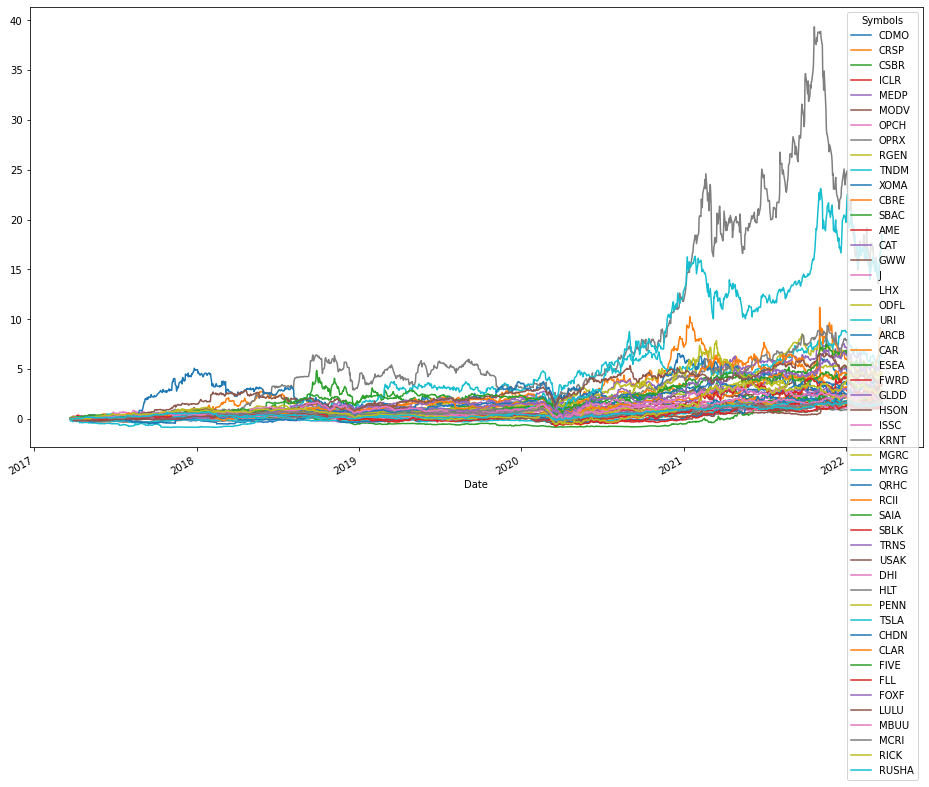

In [49]:
return_series_close.plot(figsize=(16,9))

In [50]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [51]:
highest.dropna(axis=1, how="all")

Symbols,MEDP,OPRX,TNDM,CAR,SAIA,TRNS,TSLA
Date,,,,,,,
2017-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

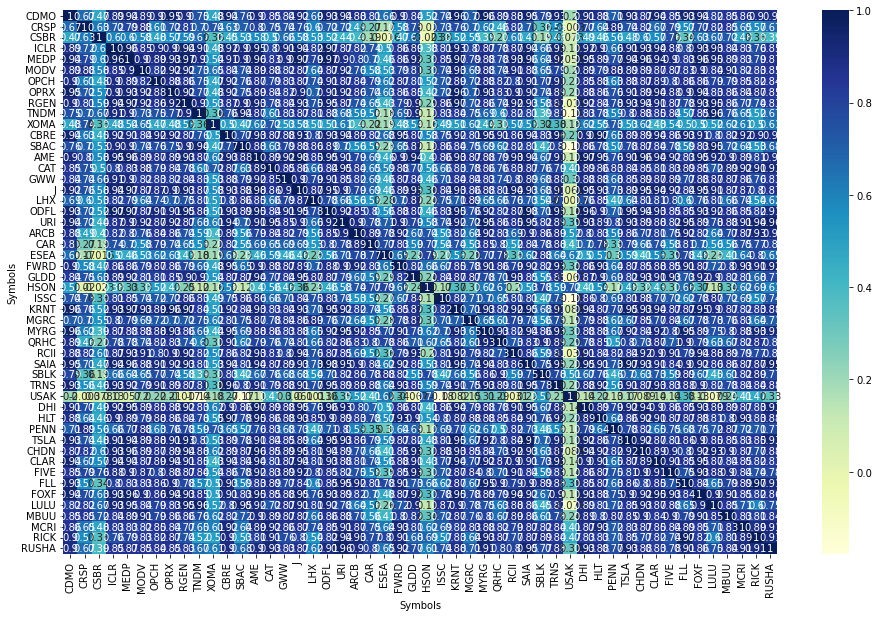

In [52]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [53]:
correlation = correlation[correlation < 0.1]
correlation

Symbols,CDMO,CRSP,CSBR,ICLR,MEDP,MODV,OPCH,OPRX,RGEN,TNDM,...,CHDN,CLAR,FIVE,FLL,FOXF,LULU,MBUU,MCRI,RICK,RUSHA
Symbols,,,,,,,,,,,,,,,,,,,,,
CDMO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSBR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ICLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MEDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MODV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OPCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OPRX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RGEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF

In [54]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [55]:
indexes = []
for i in range(len(df3)):
    each = df3.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [56]:
chosen_df = df3.iloc[indexes]
chosen_df #50 stocks for the aggressive model

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
310,CDMO,"Avid Bioservices, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,19.6450,0.146303,1.209769e+09,...,0.136,0.1500,61.390630,144.448530,9.822500e+00,999.00,0.298786,0.688251,0.654617,0.839
351,CRSP,CRISPR Therapeutics AG,Healthcare,Increase,Above Fair Price,UnderValued,No Data,55.6600,0.147264,4.259493e+09,...,5.263,-2.0040,-7.906250,10.575717,-8.200419e+00,999.00,0.272043,0.649606,0.295733,0.688
355,CSBR,"Champions Oncology, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,7.8900,-0.013077,1.066326e+08,...,0.020,0.1500,34.304348,394.500000,3.945000e+00,999.00,0.141975,0.686045,0.120134,0.603
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.2500,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,2.414215e+02,999.00,0.124956,0.296964,0.223068,0.843
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.0300,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,6.580331e+01,999.00,0.179658,0.498130,0.345048,0.968
651,MODV,ModivCare Inc.,Healthcare,Increase,Below Fair Price,OverValued,No Data,101.5100,0.209990,1.421120e+09,...,1.594,0.6845,13.552737,63.682560,1.575569e+03,999.00,0.090920,0.383729,0.202971,0.644
711,OPCH,"Option Care Health, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,23.1900,-0.012280,4.171302e+09,...,0.451,0.1000,25.766668,51.419070,7.771849e+00,999.00,0.245300,0.604863,0.286065,0.729
715,OPRX,OptimizeRx Corporation,Healthcare,Increase,Below Fair Price,OverValued,No Data,41.6500,0.330272,7.400997e+08,...,0.067,0.5000,49.000000,621.641800,2.275756e+02,999.00,0.088489,0.679004,0.808683,1.141
778,RGEN,Repligen Corporation,Healthcare,Increase,Below Fair Price,OverValued,No Data,181.4600,0.455590,1.003265e+10,...,2.101,0.2850,57.974440,86.368390,2.463760e+02,999.00,0.117663,0.415307,0.448328,0.963
882,TNDM,"Tandem Diabetes Care, Inc.",Healthcare,Increase,Below Fair Price,UnderValued,No Data,105.2100,-0.058674,6.684275e+09,...,0.339,5.9000,140.280000,310.354000,5.301372e+08,999.00,0.065392,0.791402,0.353611,0.877


In [57]:
chosen_df.to_csv("selected_stocks_aggressive.csv")

## EDA

In [58]:
chosen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 310 to 792
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticker                50 non-null     object 
 1   name                  50 non-null     object 
 2   sector                50 non-null     object 
 3   Earnings_expectation  50 non-null     object 
 4   irv_status            50 non-null     object 
 5   capm_status           50 non-null     object 
 6   esg_status            50 non-null     object 
 7   current_price         50 non-null     float64
 8   annu_return_10y       50 non-null     float64
 9   market_cap            50 non-null     float64
 10  marketcap_cat         50 non-null     object 
 11  beta                  50 non-null     float64
 12  eps_ttm               50 non-null     float64
 13  growth_estimate_5y    50 non-null     float64
 14  pe_forward            50 non-null     float64
 15  pe_trailing           

In [59]:
chosen_df.describe()

,current_price,annu_return_10y,market_cap,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
count,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000
mean,126.150132,0.152867,2.764458e+10,1.273600,3.961600,0.469392,24.520303,91.758611,1.069736e+07,783.761200,0.174018,0.490122,0.294523,0.782580
std,140.445604,0.136322,1.143182e+11,0.543153,3.981206,1.041244,30.113050,180.292147,7.496032e+07,409.410601,0.066025,0.163346,0.140107,0.160257
min,7.120000,-0.182789,7.973087e+07,0.310000,0.020000,-2.004000,-90.260870,7.128537,-8.200419e+00,6.990000,0.056883,0.267604,0.120134,0.603000
25%,32.910000,0.105175,9.907033e+08,0.855000,0.615500,0.133700,12.916799,18.956910,1.838113e+01,999.000000,0.123133,0.356788,0.194006,0.661000
50%,86.310000,0.151416,4.119305e+09,1.235000,3.129000,0.231150,19.237789,31.693050,6.677441e+01,999.000000,0.169326,0.462529,0.269330,0.734500
75%,157.735000,0.205490,1.733952e+10,1.710000,5.154750,0.369250,27.791628,56.625257,3.822444e+02,999.000000,0.227066,0.610486,0.352193,0.842000
max,806.050000,0.609586,8.094838e+11,2.500000,17.495000,5.900000,140.280000,1056.821400,5.301372e+08,999.000000,0.323098,0.931402,0.808683,1.252000
